This notebooks is based off JVP book - Chapters 1-3; Wes McKinney also an excellent source for this material.

# 1. Juypter Notebooks

In [1]:
1+1

2

In [2]:
4**2

16

In [3]:
import pandas as pd
import numpy as np

In [4]:
pd.__version__

'0.23.3'

Tab Complete

In [ ]:
pd.

In [5]:
pd.DataFrame()

""


In [3]:
from numpy import ri

SyntaxError: invalid syntax (<ipython-input-3-f6341a23faff>, line 1)

Help and accessing code

In [6]:
np.mean?

In [ ]:
np.mean()

Timing code

In [134]:
L = [0, 1, 2]

In [135]:
L

[0, 1, 2]

In [136]:
L = [n**2 for n in range(1000)]

In [138]:
L[:5]

[0, 1, 4, 9, 16]

In [139]:
%%timeit
L = []
for n in range(10000):
    L.append(n**2)

3.67 ms ± 235 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [140]:
%timeit L = [n**2 for n in range(10000)]

3.06 ms ± 60.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [141]:
#%lprun; %prun

Suppress output

In [142]:
np.sin(10)

-0.5440211108893699

In [143]:
np.sin(10);

importing code while prototyping

In [144]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
? %autoreload

# 2. NumPy

### 2.1 Type, creating and accessing

NumPy, short for Numerical Python, is a library that provides efficient storage and data operations on arrays. They are essential tools for a data scientist.

List: Flexibility comes at a cost - each item in the list must contain its own type info, reference count, and other information—that is, each item is a complete Python object. In the special case that all variables are of the same type, much of this information is redundant: it can be much more efficient to store data in a fixed-type array.

In [146]:
L = [True, '2', 12, 3.14]  # convenience at a cost

In [147]:
[type(l) for l in L]

[bool, str, int, float]

In [148]:
# figure 2.2: under the hood mappings

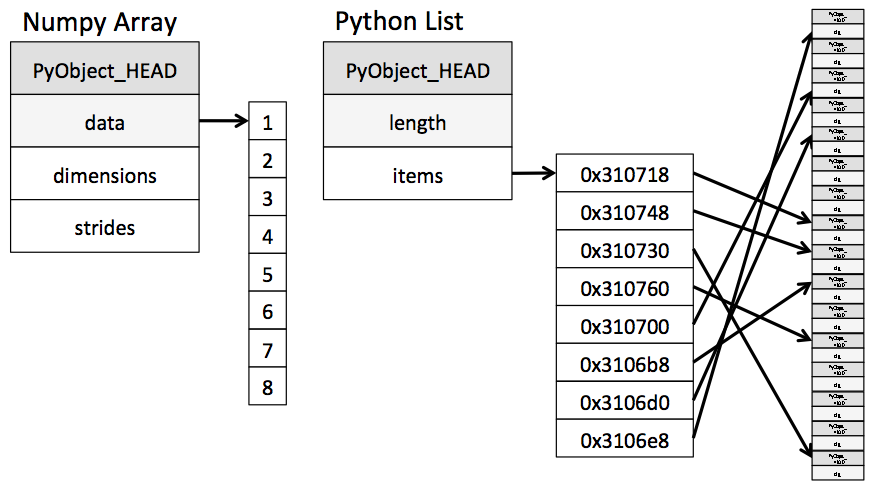

In [149]:
np.array([1,3,4,6]) #fixed type

array([1, 3, 4, 6])

In [151]:
np.array([1,3,4,6.3]) #fixed type

array([1. , 3. , 4. , 6.3])

In [152]:
np.array([1,3,4,6], dtype='float32') #explicit type

array([1., 3., 4., 6.], dtype=float32)

In [153]:
np.array([[1,2,3],[4,5,6],[7,8,9]]) #multi-d, >lists

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Creating arrays

In [154]:
np.ones((3,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [155]:
np.zeros((5,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [156]:
np.arange(0,10,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [157]:
np.random.rand(3,5)

array([[0.98196375, 0.01029789, 0.32355771, 0.58684807, 0.13648039],
       [0.69725656, 0.59923991, 0.27325301, 0.29266731, 0.05453449],
       [0.27210604, 0.86255861, 0.23781113, 0.3007662 , 0.90815994]])

Attributes

In [7]:
x1 = np.random.randint(10, size=6)
x2 = np.random.randint(10, size=(3,4))
x3 = np.random.randint(10, size=(3,4,5))

In [8]:
x1

array([9, 9, 9, 8, 3, 9])

In [9]:
x1[5]

9

In [10]:
x2

array([[9, 1, 7, 2],
       [4, 2, 9, 3],
       [1, 3, 4, 9]])

In [14]:
x2[2][1]

3

In [159]:
x3.ndim

3

In [161]:
x3.shape

(3, 4, 5)

In [162]:
x3.size

60

Indexing/Slicing

In [164]:
x1

array([8, 1, 0, 7, 2, 8])

In [166]:
x1[0]

8

In [169]:
x1[len(x1)-1]

8

In [170]:
x1[-1]

8

In [171]:
x2

array([[6, 2, 1, 3],
       [6, 6, 4, 2],
       [3, 5, 8, 7]])

In [172]:
x2[2,1]

5

Indexing: returns views, not copies
-differs from lists
-allows modification

In [173]:
x1

array([8, 1, 0, 7, 2, 8])

In [182]:
x1_temp = x1[3:4]

In [183]:
x1_temp = 99

In [184]:
x1

array([8, 1, 0, 7, 2, 8])

In [185]:
x1[::2]

array([8, 0, 2])

In [186]:
x1[::-1]

array([8, 2, 7, 0, 1, 8])

In [187]:
x2[:2,:2]

array([[6, 2],
       [6, 6]])

Concatenation

In [32]:
x1.shape

(6,)

In [33]:
x1[np.newaxis,:].shape


(1, 6)

In [34]:
np.concatenate([x1[np.newaxis,:],x1[np.newaxis,:]], axis=0)

array([[9, 8, 4, 1, 1, 5],
       [9, 8, 4, 1, 1, 5]])

### 2.2 Functions

Why numpy is really so important: flexible, optimized computation (vectorization).

Vectorized operations in NumPy are implemented via ufuncs, whose main purpose is to quickly execute repeated operations on values in NumPy arrays.


In [188]:
np.exp(x1)

array([2.98095799e+03, 2.71828183e+00, 1.00000000e+00, 1.09663316e+03,
       7.38905610e+00, 2.98095799e+03])

In [189]:
x1*x1

array([64,  1,  0, 49,  4, 64])

In [190]:
x1**2

array([64,  1,  0, 49,  4, 64])

In [191]:
import math
%timeit [math.sqrt(x) for x in range(1000)]

133 µs ± 8.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [192]:
%timeit np.sqrt(np.arange(1000))

5.71 µs ± 56.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### 2.3 Random

In [15]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [16]:
matplotlib.rcParams['figure.figsize'] =[10,6]

In [17]:
#Generate random pairs that have a multivariate normal distribution
N = 1000
mu = np.array([0,0])
cov = 0.9
sig = np.array([[1, cov],[cov, 1]]) #Must be square, symmetric and non-negative definite

In [18]:
x, y = np.random.multivariate_normal(mu, sig, N).T

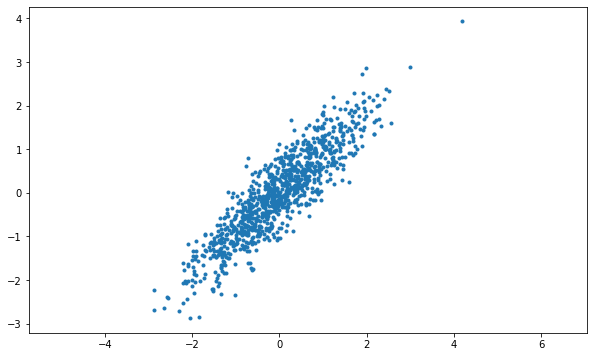

In [19]:
plt.plot(x, y,'.') 
plt.axis('equal') 
plt.show()

In [202]:
''' from Wes McKinney book'''
nsteps = 1000
draws = np.random.randint(0, 2, size = nsteps) 

In [203]:
draws[:10]

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0])

In [204]:
steps = np.where(draws > 0, 1, -1)

In [205]:
steps[:10]

array([-1, -1,  1,  1, -1,  1, -1,  1,  1, -1])

In [207]:
walk = steps.cumsum()

In [208]:
walk[:10]

array([-1, -2, -1,  0, -1,  0, -1,  0,  1,  0])

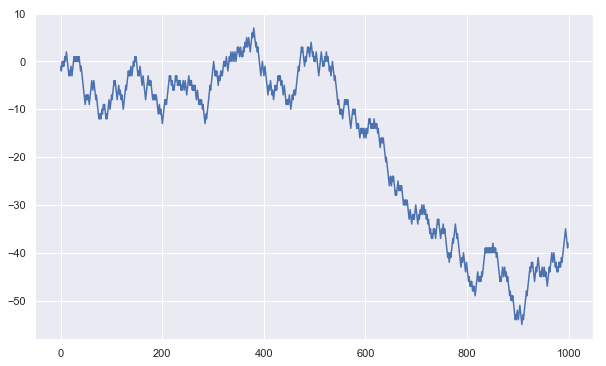

In [209]:
plt.plot(np.arange(len(walk)), walk)
plt.show()

### 2.4 Broadcasting and Matrix Multiplication

Adapted from https://github.com/fastai/fastai/blob/master/courses/ml1/lesson4-mnist_sgd.ipynb

#### Element-wise operations

Broadcasting and element-wise operations are supported in the same way by both numpy and pytorch.

Operators (+,-,*,/,>,<,==) are usually element-wise.

Examples of element-wise operations:

In [50]:
a = np.array([10, 6, -4])
b = np.array([2, 8, 7])
a,b

(array([10,  6, -4]), array([2, 8, 7]))

In [51]:
a + b

array([12, 14,  3])

In [52]:
(a < b).mean()

0.6666666666666666

The term broadcasting describes how arrays with different shapes are treated during arithmetic operations. The term broadcasting was first used by Numpy, although is now used in other libraries such as Tensorflow and Matlab; the rules can vary by library.

The term broadcasting describes how numpy treats arrays with 
different shapes during arithmetic operations. Subject to certain 
constraints, the smaller array is “broadcast” across the larger 
array so that they have compatible shapes. Broadcasting provides a 
means of vectorizing array operations so that looping occurs in C
instead of Python. It does this without making needless copies of 
data and usually leads to efficient algorithm implementations.

In [53]:
a

array([10,  6, -4])

In [54]:
a>0

array([ True,  True, False])

How are we able to do a > 0? 0 is being broadcast to have the same dimensions as a.

Remember above when we normalized our dataset by subtracting the mean (a scalar) from the entire data set (a matrix) and dividing by the standard deviation (another scalar)? We were using broadcasting!

Other examples of broadcasting with a scalar:

In [55]:
a+1

array([11,  7, -3])

In [58]:
m = np.array([[1, 2, 3], [4,5,6], [7,8,9]])

In [59]:
m

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

#### Broadcasting a vector to a matrix

We can also broadcast a vector to a matrix:

In [62]:
c = np.array([10,20,30])

In [63]:
c

array([10, 20, 30])

In [64]:
c + m

array([[11, 22, 33],
       [14, 25, 36],
       [17, 28, 39]])

In [65]:
c.shape

(3,)

Can use np.newaxis, Non, or np.expand_dims to expand the dimension

In [67]:
c[:,None].shape

(3, 1)

In [68]:
c[:, np.newaxis].shape

(3, 1)

In [70]:
np.expand_dims(c, 1).shape

(3, 1)

In [71]:
np.broadcast_to(c[:,np.newaxis], m.shape)

array([[10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [73]:
np.broadcast_to(c[:,np.newaxis], (3,3))

array([[10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [75]:
m + c[:,np.newaxis]

array([[11, 12, 13],
       [24, 25, 26],
       [37, 38, 39]])

In [76]:
m + c[np.newaxis,:]

array([[11, 22, 33],
       [14, 25, 36],
       [17, 28, 39]])

In [78]:
np.broadcast_to(c[:,np.newaxis], (3,3))

array([[10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

#### Broadcasting Rules

In [79]:
c.shape

(3,)

In [80]:
c

array([10, 20, 30])

In [102]:
np.expand_dims(c,0)

array([[10, 20, 30]])

In [81]:
c[np.newaxis,:]

array([[10, 20, 30]])

In [82]:
c[np.newaxis,:].shape

(1, 3)

In [83]:
c[:, np.newaxis]

array([[10],
       [20],
       [30]])

In [84]:
c[np.newaxis,:]> c[:,np.newaxis]

array([[False,  True,  True],
       [False, False,  True],
       [False, False, False]])

In [88]:
xg, yg = np.ogrid[0:5,0:5]; xg, yg

(array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3, 4]]))

In [89]:
xg+yg

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8]])


When operating on two arrays, Numpy/PyTorch compares their shapes element-wise. It starts with the trailing dimensions, and works its way forward. Two dimensions are compatible when

- they are equal, or
- one of them is 1

Arrays do not need to have the same number of dimensions. For example, if you have a 256x256x3 array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

Image  (3d array): 256 x 256 x 3

Scale  (1d array):             3

Result (3d array): 256 x 256 x 3


In [105]:
m*c

array([[ 10,  40,  90],
       [ 40, 100, 180],
       [ 70, 160, 270]])

In [106]:
np.broadcast_to(c[np.newaxis,:], (3,3))

array([[10, 20, 30],
       [10, 20, 30],
       [10, 20, 30]])

In [107]:
m

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

#### 2.5 Example: KNN

In [108]:
rand = np.random.RandomState(42)
X = rand.rand(10, 2)

In [109]:
X

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914]])

In [117]:
X.shape

(10, 2)

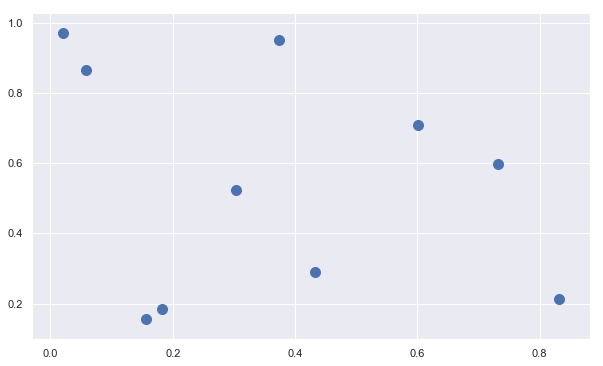

In [112]:
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling 
plt.scatter(X[:, 0], X[:, 1], s=100);

In [114]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

In [115]:
dist_sq

array([[0.        , 0.25171654, 0.67933117, 0.10729142, 0.11021119,
        0.12565305, 0.75487265, 0.62590345, 0.1863819 , 0.43821601],
       [0.25171654, 0.        , 0.52769893, 0.52572083, 0.02910074,
        0.64393098, 0.1593326 , 0.47512176, 0.18843303, 0.18454216],
       [0.67933117, 0.52769893, 0.        , 0.51394921, 0.50290096,
        0.68080058, 0.46072414, 0.00141727, 0.15795558, 0.09442377],
       [0.10729142, 0.52572083, 0.51394921, 0.        , 0.31987984,
        0.01216687, 1.02713477, 0.48148903, 0.17716149, 0.47033641],
       [0.11021119, 0.02910074, 0.50290096, 0.31987984, 0.        ,
        0.40557444, 0.29926414, 0.45108072, 0.12173825, 0.20237694],
       [0.12565305, 0.64393098, 0.68080058, 0.01216687, 0.40557444,
        0.        , 1.23302708, 0.64458914, 0.27862329, 0.62982499],
       [0.75487265, 0.1593326 , 0.46072414, 1.02713477, 0.29926414,
        1.23302708, 0.        , 0.42414057, 0.37660024, 0.16662198],
       [0.62590345, 0.47512176, 0.0014172

Break this into steps, first broadcasting

In [120]:
temp1 = np.broadcast_to(X[np.newaxis, :, :], (10,10,2))
temp2 = np.broadcast_to(X[:, np.newaxis, :], (10,10,2))

In [122]:
temp1[:5,:5,0]

array([[0.37454012, 0.73199394, 0.15601864, 0.05808361, 0.60111501],
       [0.37454012, 0.73199394, 0.15601864, 0.05808361, 0.60111501],
       [0.37454012, 0.73199394, 0.15601864, 0.05808361, 0.60111501],
       [0.37454012, 0.73199394, 0.15601864, 0.05808361, 0.60111501],
       [0.37454012, 0.73199394, 0.15601864, 0.05808361, 0.60111501]])

In [123]:
temp1[:5,:5,1]

array([[0.95071431, 0.59865848, 0.15599452, 0.86617615, 0.70807258],
       [0.95071431, 0.59865848, 0.15599452, 0.86617615, 0.70807258],
       [0.95071431, 0.59865848, 0.15599452, 0.86617615, 0.70807258],
       [0.95071431, 0.59865848, 0.15599452, 0.86617615, 0.70807258],
       [0.95071431, 0.59865848, 0.15599452, 0.86617615, 0.70807258]])

In [125]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :] 
differences.shape

(10, 10, 2)

In [126]:
differences;

In [127]:
# square the coordinate differences 
sq_differences = differences ** 2 
sq_differences.shape

(10, 10, 2)

In [128]:
# sum the coordinate differences to get the squared distance 
dist_sq = sq_differences.sum(axis=-1)
dist_sq.shape

(10, 10)

In [129]:
dist_sq

array([[0.        , 0.25171654, 0.67933117, 0.10729142, 0.11021119,
        0.12565305, 0.75487265, 0.62590345, 0.1863819 , 0.43821601],
       [0.25171654, 0.        , 0.52769893, 0.52572083, 0.02910074,
        0.64393098, 0.1593326 , 0.47512176, 0.18843303, 0.18454216],
       [0.67933117, 0.52769893, 0.        , 0.51394921, 0.50290096,
        0.68080058, 0.46072414, 0.00141727, 0.15795558, 0.09442377],
       [0.10729142, 0.52572083, 0.51394921, 0.        , 0.31987984,
        0.01216687, 1.02713477, 0.48148903, 0.17716149, 0.47033641],
       [0.11021119, 0.02910074, 0.50290096, 0.31987984, 0.        ,
        0.40557444, 0.29926414, 0.45108072, 0.12173825, 0.20237694],
       [0.12565305, 0.64393098, 0.68080058, 0.01216687, 0.40557444,
        0.        , 1.23302708, 0.64458914, 0.27862329, 0.62982499],
       [0.75487265, 0.1593326 , 0.46072414, 1.02713477, 0.29926414,
        1.23302708, 0.        , 0.42414057, 0.37660024, 0.16662198],
       [0.62590345, 0.47512176, 0.0014172

In [130]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Find nn

In [107]:
nearest = np.argsort(dist_sq, axis=1) ## sort along the rows
print(nearest)

[[0 3 4 5 8 1 9 7 2 6]
 [1 4 6 9 8 0 7 3 2 5]
 [2 7 9 8 6 4 3 1 0 5]
 [3 5 0 8 4 9 7 2 1 6]
 [4 1 0 8 9 6 3 5 7 2]
 [5 3 0 8 4 9 1 7 2 6]
 [6 1 9 4 8 7 2 0 3 5]
 [7 2 9 8 6 4 1 3 0 5]
 [8 9 4 7 2 3 0 1 5 6]
 [9 8 7 2 6 1 4 0 3 5]]


In [108]:
temp = np.arange(10)
np.random.shuffle(temp)
temp

array([2, 3, 9, 5, 7, 6, 0, 8, 4, 1])

In [109]:
temp[np.argpartition(temp,3)]

array([0, 1, 2, 3, 4, 6, 5, 7, 8, 9])

In [110]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

In [111]:
nearest_partition

array([[3, 0, 4, 5, 8, 9, 1, 7, 2, 6],
       [1, 4, 6, 9, 3, 5, 2, 7, 8, 0],
       [2, 7, 9, 8, 6, 4, 5, 1, 3, 0],
       [3, 5, 0, 8, 4, 1, 6, 7, 2, 9],
       [1, 4, 0, 8, 9, 6, 2, 7, 5, 3],
       [5, 3, 0, 8, 4, 1, 6, 7, 2, 9],
       [1, 9, 6, 4, 3, 5, 2, 7, 8, 0],
       [7, 2, 9, 8, 6, 4, 5, 1, 3, 0],
       [8, 9, 4, 7, 2, 3, 0, 1, 5, 6],
       [8, 7, 9, 2, 1, 6, 4, 5, 3, 0]])

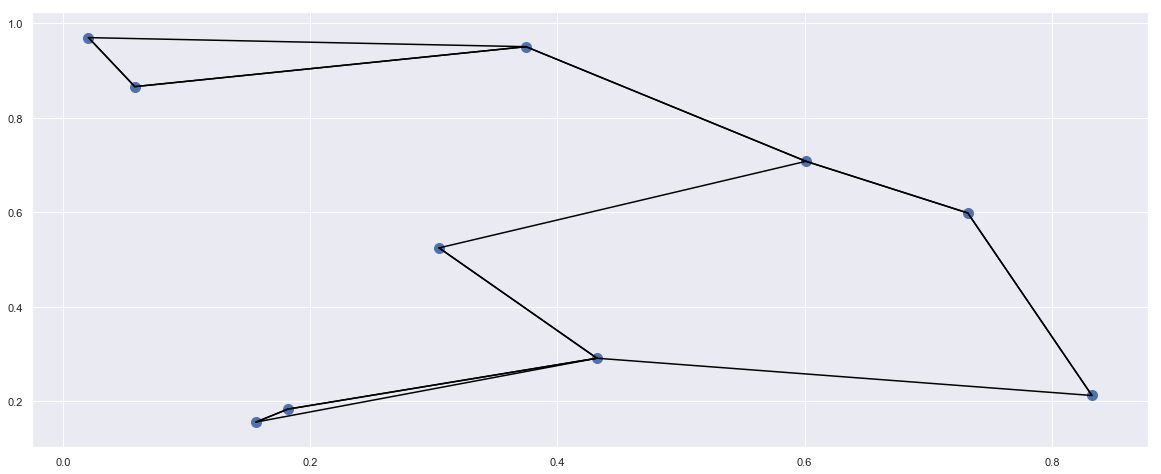

In [112]:
plt.scatter(X[:, 0], X[:, 1], s=100)
# draw lines from each point to its two nearest neighbors
K=2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
    # plot a line from X[i] to X[j]
    # use some zip magic to make it happen: 
        plt.plot(*zip(X[j], X[i]), color='black')

# 3. Pandas

Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a DataFrame. DataFrames are essentially multidimen‐ sional arrays with attached row and column labels, and often with heterogeneous types and/or missing data. 

A Pandas Series is a one-dimensional array of indexed data. The essential difference between a NumPy array and the Pandas Sereis is the index: former has *implicitly defined integer index used to access the values, while latter an explicitly defined index associated with the values.  Typing makes is more efficient than a dictionary struture.

In [20]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
                 'Florida': 170312, 'Illinois': 149995}
population_dict = {'California': 38332521,
                               'Texas': 26448193,
                               'New York': 19651127,
                               'Florida': 19552860,
                               'Illinois': 12882135}
population = pd.Series(population_dict)
area = pd.Series(area_dict)

In [21]:
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [22]:
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [23]:
area.dtypes

dtype('int64')

Dataframe

In [24]:
states = pd.DataFrame({'population': population,
                                   'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [30]:
type(states['population'].values)

numpy.ndarray

In [28]:
type(states[['population', 'area']])

pandas.core.frame.DataFrame

In [118]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [119]:
states.columns

Index(['population', 'area'], dtype='object')

In [121]:
states.loc['California']

population    38332521
area            423967
Name: California, dtype: int64

In [122]:
states.iloc[1]

population    26448193
area            695662
Name: Texas, dtype: int64

In [123]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [124]:
states.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [31]:
states['density'] = states['population']/states['area']
states

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


In [32]:
states.iloc[0,2] = 90.0
states

,population,area,density
California,38332521,423967,90.000000
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


In [33]:
states.loc['Texas']

population    2.644819e+07
area          6.956620e+05
density       3.801874e+01
Name: Texas, dtype: float64

In [34]:
states.iloc[1]

population    2.644819e+07
area          6.956620e+05
density       3.801874e+01
Name: Texas, dtype: float64

In [127]:
states[states.density > 100]

,population,area,density
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121


In [128]:
states['population']/2

California    19166260.5
Texas         13224096.5
New York       9825563.5
Florida        9776430.0
Illinois       6441067.5
Name: population, dtype: float64

In [129]:
states2 = states.iloc[:3].copy()

In [130]:
states2+states

,population,area,density
California,76665042.0,847934.0,180.000000
Florida,NaN,NaN,NaN
Illinois,NaN,NaN,NaN
New York,39302254.0,282594.0,278.153492
Texas,52896386.0,1391324.0,76.037481


In [ ]:
states.mean(axis=0)